<a href="https://colab.research.google.com/github/satish0110/Encryptix/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salesprediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5620634%2F9285414%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240831%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240831T050323Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D52e8f29cbcd770041e83f3f300f6af79ab7562b0a73272e1906e4a261bce861fe9fb43a2092563dac7c23225a07cff4c13e09d51c7a8a1807ed4002b6d71be4a8d453b661d9f097433190cc6a2cba78e2cbcc96b9b7fa4f454359e51c53e5dd3449603567c001290211d68265ed32d0f635a2b676379be95a9ad30bbe49f93219cec1ada0ecac3793d99a0abef75b31d6da73d126337349429e4d02cb501a64bc76cd784982b1106d41167c41e1a527d1263c0807d31646b009e9645bc789402fef034a5de45d60c2cd674e661092f3518c2f5266a158d615156d2a5353edbc8204b395710b3133c05266d30def10830dce6f7e4d03e400eb66d18b919a16c2c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# SALES PREDICTION USING PYTHON

Sales prediction with Python enables businesses to forecast future sales based on factors like advertising expenses, customer segmentation, and marketing platforms. Leveraging machine learning techniques, companies can analyze historical data, build predictive models, and make data-driven decisions to optimize marketing strategies, allocate resources efficiently, and maximize revenue potential. By continuously updating the models with new data, businesses can adapt to market dynamics and achieve better performance in a competitive environment.

In [ ]:
# Import necessary libraries

import numpy as ny
import pandas as ps
import seaborn as sb
import matplotlib.pyplot as mpl
import os
import statsmodels.formula.api as s
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()


'/kaggle/working'

In [ ]:
# Load dataset

dt = ps.read_csv("/kaggle/input/salesprediction/advertising.csv")

### Exploratory Data Analysis

In [ ]:
# View the first few rows of the dataset

dt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Get the column names of the dataset

dt.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
# To rename the column 'Unnamed: 0' to 'Index'
dt.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)


In [ ]:
dt

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Get the shape of the dataset (rows, columns)

dt.shape

(200, 4)

In [ ]:
# Check information about the dataset, data types, and missing values

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Get statistical summary of the numerical columns

dt.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [ ]:
# Check for missing values in the dataset

dt.isnull().values.any()
dt.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


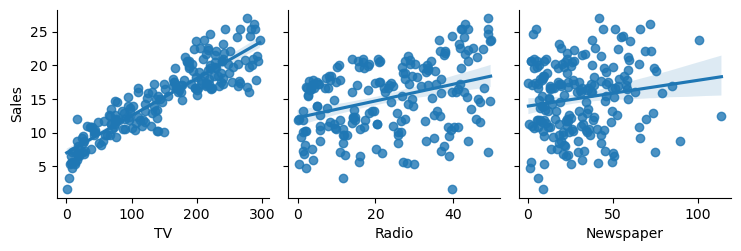

In [ ]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sb.pairplot(dt, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

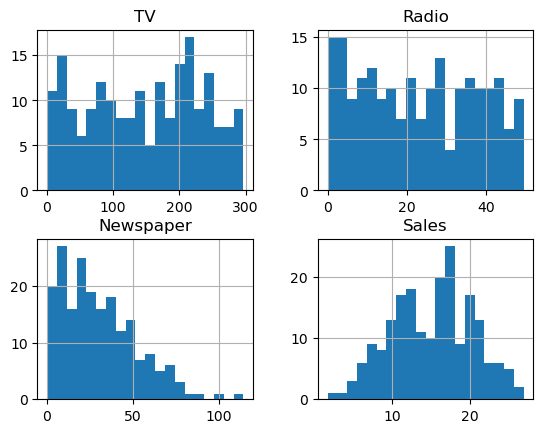

In [ ]:
# Histograms to check the normality assumption of the dependent variable (Sales)

dt.hist(bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


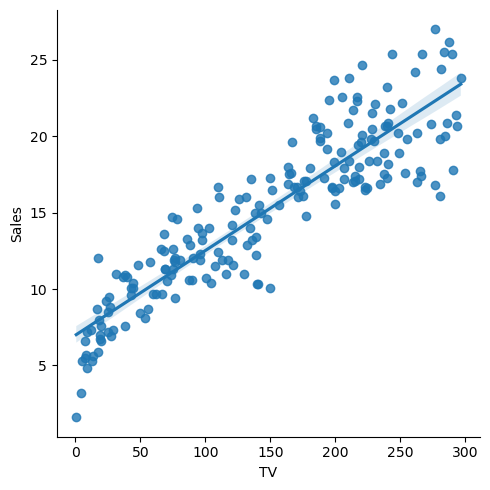

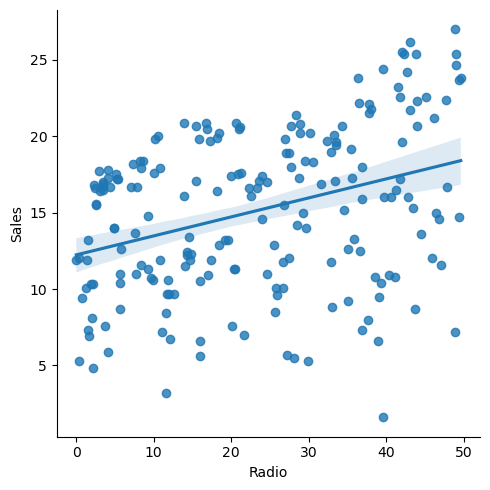

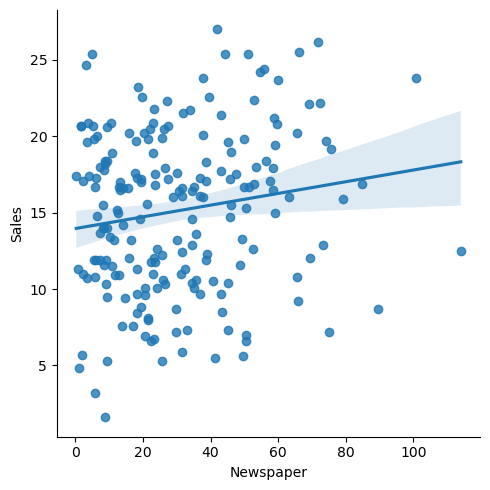

In [ ]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable

sb.lmplot(x='TV', y='Sales', data=dt)
sb.lmplot(x='Radio', y='Sales', data=dt)
sb.lmplot(x='Newspaper',y= 'Sales', data=dt)

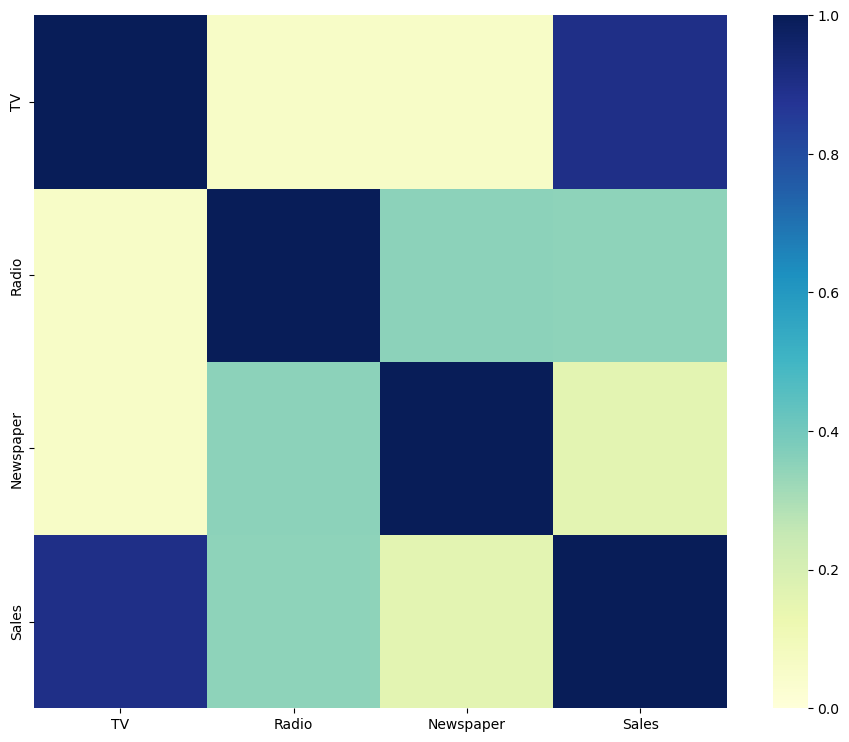

In [ ]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = dt.corr()
f, ax = mpl.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
mpl.show()

In [ ]:
# Model Preparation

X = dt.drop('Sales', axis=1)
y = dt[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [ ]:
# Linear Regression Model

lin_model = s.ols(formula="Sales ~ TV + Radio + Newspaper", data=dt).fit()


In [ ]:
# Print the coefficients of the linear model

print(lin_model.params, "\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [ ]:
# Print the summary of the linear regression model

print(lin_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           8.13e-99
Time:                        04:59:00   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [ ]:
# Evaluate the model

results = []
names = []

In [ ]:
# Define a list of models to evaluate

models = [('LinearRegression', LinearRegression())]

In [ ]:
# Loop through each model, fit it to the data, and calculate the RMSE

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = ny.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 1.612152


In [ ]:
# Make predictions on new data

new_data = ps.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    15.428155
dtype: float64


In [ ]:
# Make predictions on new data

new_data = ps.DataFrame({'TV': [25], 'Radio': [63], 'Newspaper': [80]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    12.754199
dtype: float64
